In [119]:
import pandas as pd
import numpy as np

In [143]:
import matplotlib.pyplot as plt
#import matplotlib as mpl
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
sns.set_style('darkgrid') #whitegrid, dark, white, ticks
plt.rc('font', family='Malgun Gothic') #한글 폰트 적용시
plt.rcParams["figure.figsize"] = (16,4.5) #차트 사이즈

In [86]:
# 선거구 지도 모양을 읽어서 좌표화 
df = pd.read_excel('C:/gd/GIS_O/2022/선거구.xlsx', sheet_name='coordinate', index_col=None, header=None)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       15 non-null     object
 1   1       22 non-null     object
 2   2       23 non-null     object
 3   3       24 non-null     object
 4   4       24 non-null     object
 5   5       25 non-null     object
 6   6       23 non-null     object
 7   7       22 non-null     object
 8   8       23 non-null     object
 9   9       23 non-null     object
 10  10      22 non-null     object
 11  11      22 non-null     object
 12  12      22 non-null     object
 13  13      21 non-null     object
 14  14      11 non-null     object
 15  15      5 non-null      object
 16  16      2 non-null      object
dtypes: object(17)
memory usage: 3.7+ KB


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,철원,화천,양구,고성(강원),NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,고양갑,양주,동두천,연천,포천,의정부갑,의정부을,남양주병,인제,춘천갑,춘천을,속초,NaN,NaN
2,NaN,NaN,파주갑,고양병,고양정,서울 도봉갑,서울 도봉을,서울 노원갑,서울 노원을,서울 노원병,남양주갑,남양주을,홍천,횡성,양양,NaN,NaN
3,NaN,NaN,파주을,고양을,김포갑,김포을,서울 강북갑,서울 강북을,서울 성북갑,서울 성북을,가평,구리,하남,정선,강릉,NaN,NaN
4,NaN,부천갑,부천을,안양 만안,광명갑,광명을,서울 서대문갑,서울 서대문을,서울 종로,서울 동대문갑,서울 동대문을,서울 중랑갑,서울 중랑을,양평,원주갑,동해,NaN


In [87]:
lst_val = []
lst_row = []
lst_col = []

for col in range(len(df.columns)):
    for row in range(len(df)):
        lst_val.append(df.values[row][col])
        lst_row.append(row)
        lst_col.append(col)

In [88]:
df2 = pd.DataFrame(
    {'name': lst_val,
     'x': lst_row,
     'y': lst_col
    })

In [89]:
df2.tail()

,name,x,y
454,NaN,22,16
455,NaN,23,16
456,NaN,24,16
457,NaN,25,16
458,NaN,26,16


In [90]:
# 선거구의 정량값을 가져옴
df_val = pd.read_excel('C:/gd/GIS_O/2022/선거구.xlsx', sheet_name='value', index_col=None, header=0)
df_val.info()
df_val.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329 entries, 0 to 328
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    329 non-null    object 
 1   value   329 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.3+ KB


,name,value
0,가평,13.074951
1,강릉,95.667035
2,강진,40.880746
3,거제,19.221905
4,거창,28.455704


In [94]:
# 선거구 좌표와 정량값을 속성조인
df_all = pd.merge(df2, df_val, on='name', how='inner')
df_all

,name,x,y,value
0,인천 강화,5,0,73.001891
1,인천 서구갑,6,0,48.050192
2,인천 동구,7,0,66.449850
3,인천 연수갑,9,0,0.402414
4,인천 옹진,10,0,93.144488
...,...,...,...,...
324,울진,7,15,62.344227
325,영덕,8,15,47.789358
326,문경,9,15,15.609693
327,울릉,6,16,93.461881


In [95]:
df_all['value'] = np.where(df_all['value'].isnull(), 0, df_all['value']) 
df_all

,name,x,y,value
0,인천 강화,5,0,73.001891
1,인천 서구갑,6,0,48.050192
2,인천 동구,7,0,66.449850
3,인천 연수갑,9,0,0.402414
4,인천 옹진,10,0,93.144488
...,...,...,...,...
324,울진,7,15,62.344227
325,영덕,8,15,47.789358
326,문경,9,15,15.609693
327,울릉,6,16,93.461881


In [123]:
table = df_all.pivot('x', 'y', 'value')
table.info()
table.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27 entries, 0 to 26
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       15 non-null     float64
 1   1       22 non-null     float64
 2   2       23 non-null     float64
 3   3       24 non-null     float64
 4   4       24 non-null     float64
 5   5       25 non-null     float64
 6   6       23 non-null     float64
 7   7       22 non-null     float64
 8   8       23 non-null     float64
 9   9       23 non-null     float64
 10  10      22 non-null     float64
 11  11      22 non-null     float64
 12  12      22 non-null     float64
 13  13      21 non-null     float64
 14  14      11 non-null     float64
 15  15      5 non-null      float64
 16  16      2 non-null      float64
dtypes: float64(17)
memory usage: 3.8 KB


y,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
x,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.516801,23.947655,24.340772,80.188837,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,24.578810,57.027352,45.780896,99.533726,81.309947,59.206582,97.000416,36.211090,66.895375,59.042816,9.174291,85.853856,NaN,NaN
2,NaN,NaN,91.424527,62.230224,41.641003,92.709351,88.260848,87.971076,58.550210,31.088830,52.363339,6.451999,3.638073,80.853631,43.983285,NaN,NaN
3,NaN,NaN,31.412078,48.928489,94.537357,45.167366,9.577110,25.856001,57.192073,26.437756,13.074951,23.225293,54.953895,8.465315,95.667035,NaN,NaN
4,NaN,19.044949,14.459123,0.367301,37.977422,35.760474,57.481596,59.868010,77.917497,90.124773,34.763443,71.536970,25.434377,5.507892,25.454429,98.631252,NaN


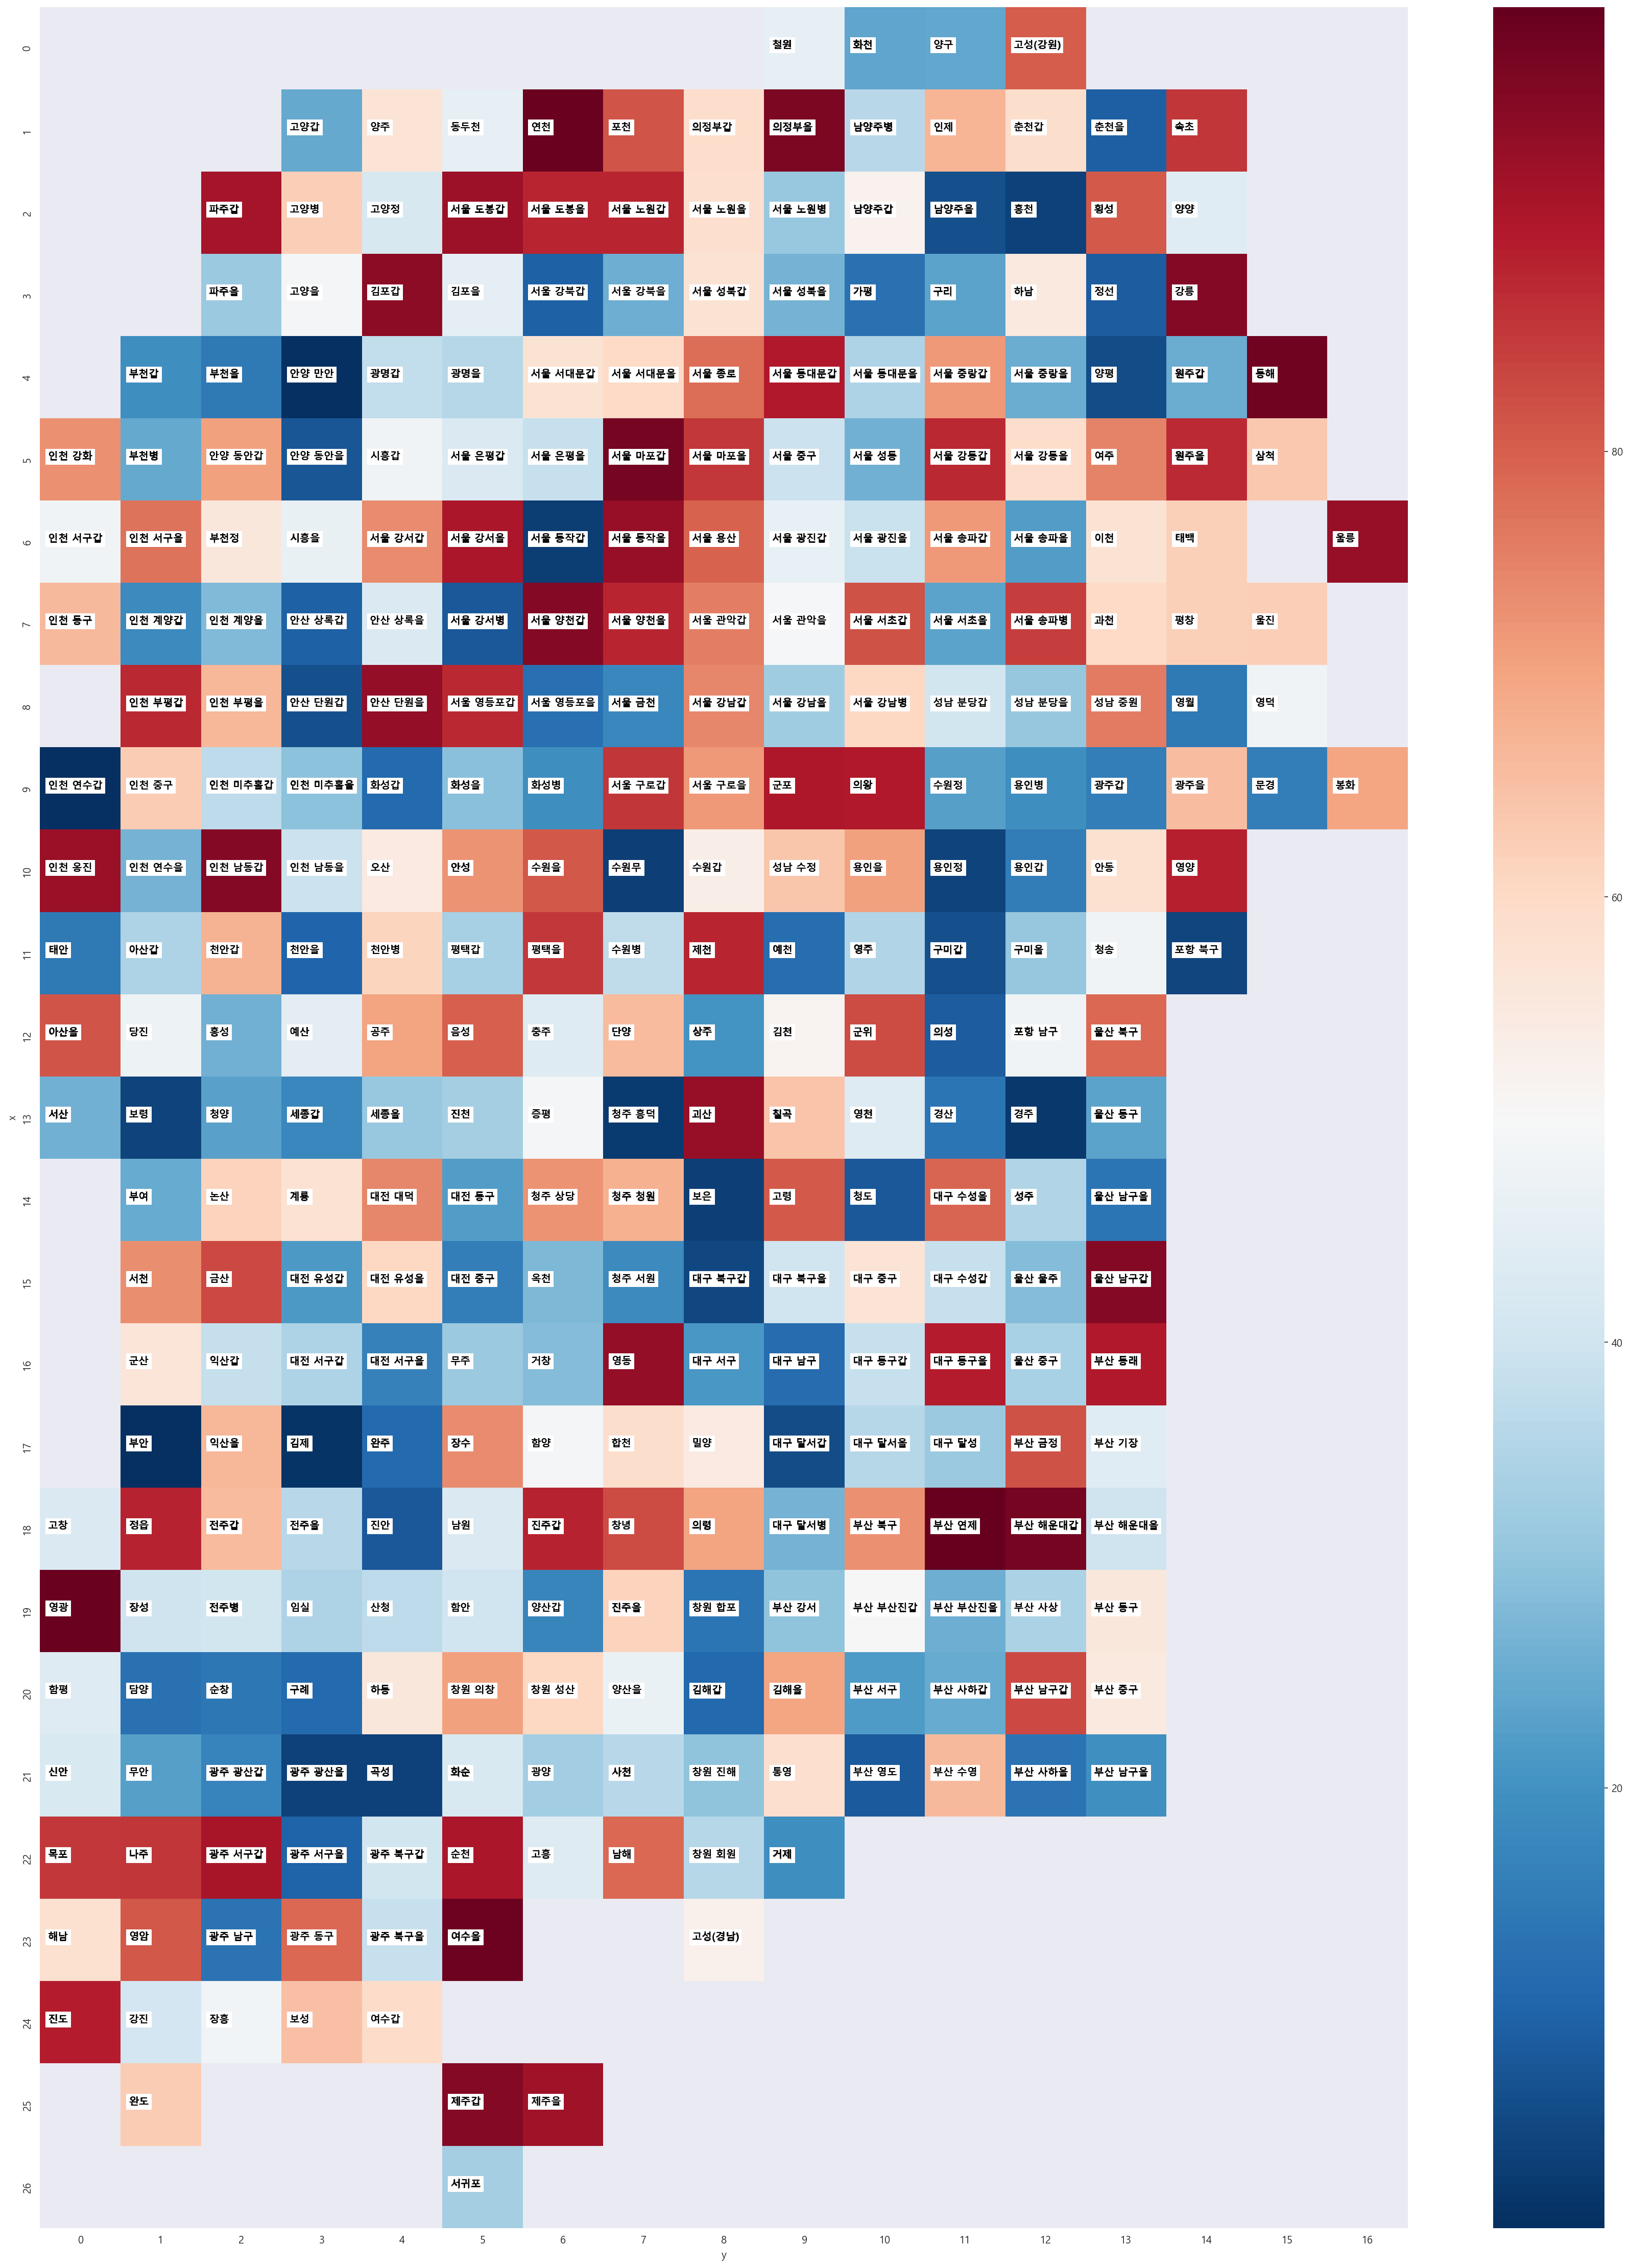

In [159]:
fig = plt.gcf()
fig.set_size_inches(30, 40)
ax = sns.heatmap(table, cmap='RdBu_r') 

for idx, row in df_all.iterrows():   
    plt.text(row.y + 0.1, row.x + 0.5, row['name'], fontsize=10, bbox={'facecolor': 'white', 'alpha':1, 'pad': 2, 'edgecolor':'white'})
    plt.text(row.y + 0.1, row.x + 0.5, row['name'], fontsize=10, color='black', alpha=1 , fontweight='bold')
    
#plt.show()
#fig = plt.gcf()